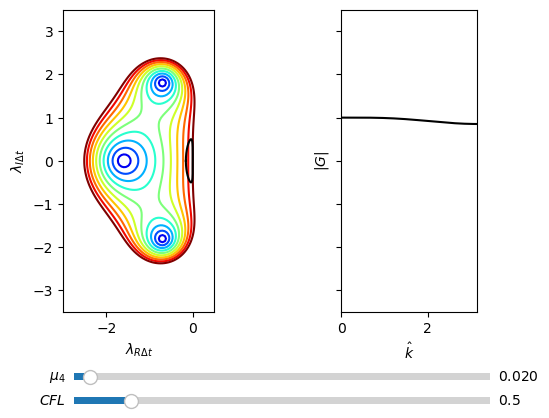

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from matplotlib import cm
from matplotlib import widgets as mpl_widgets

def rk3(lambdaR, lambdaI, dt, u0):

    alpha1 = 1./3.
    alpha2 = 1./2.
    alpha3 = 1.
  
    u1 = u0 + alpha1*(lambdaI*u0*1j + lambdaR*u0)
    u2 = u0 + alpha2*(lambdaI*u1*1j + lambdaR*u1)
    u3 = u0 + alpha3*(lambdaI*u2*1j + lambdaR*u2)

    return u3

def funcG(X,Y):

  G = np.zeros(X.shape)

  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      Z = rk3(X[i][j], Y[i][j], 1, 1)
      G[i][j] = np.abs(Z/1)

  return G

lambdar = np.arange(-8, 8, 0.05)
lambdai = np.arange(-8, 8, 0.05)
X, Y    = np.meshgrid(lambdar, lambdai)
G       = funcG(X,Y)
levels  = np.arange(0.0, 1.1, 0.1)

# Define initial parameters
mu4_init = 0.02
CFL_init = 0.50
mu4s, CFLs, ks, Gs = sp.symbols("\mu_4, CFL, \hat{k}, |G|")
lambdaRdt = sp.Symbol('\lambda_R \Delta t') 
lambdaIdt = sp.Symbol('\lambda_I \Delta t') 

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.axis('scaled')
ax2.axis('scaled')

# Create sliders and insert them within the figure
plt.subplots_adjust(bottom=0.25)

mu4_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.1, 0.65, 0.03]),
    label=f"${sp.latex(mu4s)}$",
    valmin=0.001,
    valmax=0.500,
    valinit=mu4_init,
)

CFL_slider = mpl_widgets.Slider(
    ax=plt.axes([0.2, 0.05, 0.65, 0.03]),
    label=f"${sp.latex(CFLs)}$",
    valmin=0.1,
    valmax=3.0,
    valinit=CFL_init,
)

# Define what to do when a slider changes
def update_plot(val=None):

    mu4_init = mu4_slider.val
    CFL_init = CFL_slider.val

    ax1.clear()
    ax2.clear()

    # isolines
    #G = funcG(X,Y)
    ax1.contour(X,Y,G,levels,cmap=cm.jet)
    k  = np.arange(-np.pi, np.pi, 0.01)
    G1 = np.zeros(k.shape)

    # dt*lambda
    omegar   = - 4.0 * mu4_init * CFL_init * ( 1.0 - np.cos(k) ) * ( 1.0 - np.cos(k) )
    omegai   = - CFL_init * np.sin(k)
    line1,   = ax1.plot(omegar,omegai,'black',linestyle='-')

    ax1.set_ylim(-3.5,3.5)
    ax1.set_xlim(-3.0,0.5)
    ax1.set_xlabel(f"${sp.latex(lambdaRdt)}$")
    ax1.set_ylabel(f"${sp.latex(lambdaIdt)}$")
    #ax1.set_xticks([])
    #ax1.set_yticks([])
    ax1.set_facecolor("white")
    fig.canvas.draw_idle()

    for i in range(k.size):
      Z = rk3(omegar[i], omegai[i], 1, 1)
      G1[i] = np.abs(Z/1)

    line2,   = ax2.plot(k,G1,'black',linestyle='-')
    ax2.set_xlim(0,np.pi)
    #ax2.set_ylim(0,2.0)
    ax2.set_xlabel(f"${sp.latex(ks)}$")
    ax2.set_ylabel(f"${sp.latex(Gs)}$")
    #ax2.set_xticks([])
    ax2.set_facecolor("white")
    fig.canvas.draw_idle()

mu4_slider.on_changed(update_plot)
CFL_slider.on_changed(update_plot)

# Plot the surface as initialization
update_plot()
plt.show()